In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('D:/Programming/Data analytics/static/Week 7/Week 7 (Important Data)-20220714T173612Z-001/Week 7 (Important Data)/icecream.xlsx')
data

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


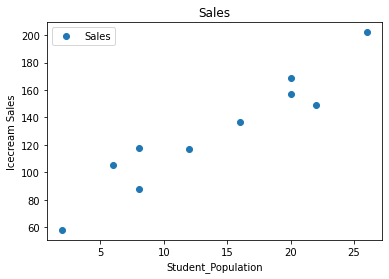

In [3]:
data.plot('Student_Population', 'Sales', style = 'o')
plt.ylabel("Icecream Sales")
plt.title("Sales")
plt.show()

In [4]:
import statsmodels.api as s
st_pop = data['Student_Population']
sales = data['Sales']
St_pop = s.add_constant(st_pop)
model1 = s.OLS(sales, St_pop)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           2.55e-05
Time:                        22:30:08   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
x = data['Student_Population'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [6]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [7]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

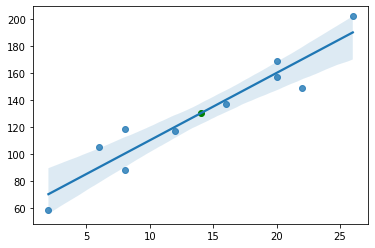

In [8]:
sns.regplot(x = x, y = y, fit_reg = True)
plt.scatter(np.mean(x), np.mean(y), color = 'green')

In [9]:
reg.predict([[10]])

array([[110.]])

In [10]:
from statsmodels.stats.outliers_influence import summary_table

In [11]:
st, data1, ss2 = summary_table(result1, 0.05)
fittedvalues = data1[:, 2]
predicted_mean_se = data1[:, 3]
predicted_mean_ci_low, predicted_mean_ci_upp = data1[:, 4:6].T
predicted_ci_low, predicted_ci_upp = data1[:, 6:8].T


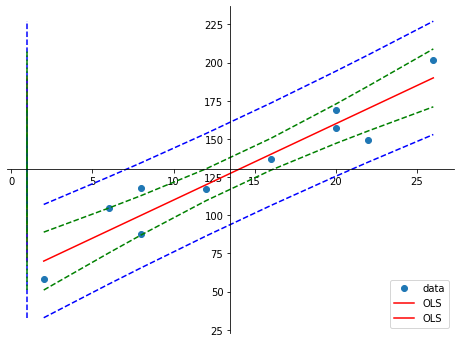

In [23]:
X = s.add_constant(x)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(x, y, 'o', label="data")
ax.plot(X, fittedvalues, 'r-', label="OLS")
ax.plot(X, predicted_ci_low, 'b--')
ax.plot(X, predicted_ci_upp, 'b--')
ax.plot(X, predicted_mean_ci_low, 'g--')
ax.plot(X, predicted_mean_ci_upp, 'g--')
ax.legend(loc = "best")
plt.show()